In [1]:
import json
with open('data/index/index.json','r') as repoDat:

    repos = json.loads(repoDat.read())


In [2]:
repoKeys = repos['packages'].keys()
import download

for key in repoKeys:
    print(key)
    current = repos['packages'][key]
    print(current.keys())
    print(len(current['versions']))
    print(current['metadata']['lastUpdated'])
    print(download.latestVersion(current)['manifest']['usesSdk']['targetSdkVersion'])
    print(current)
    break


No s3 profile found, using local storage.
An.stop
dict_keys(['metadata', 'versions'])
2
1344556800000
4
{'metadata': {'added': 1309737600000, 'categories': ['Time'], 'issueTracker': 'https://github.com/jdmonin/anstop/issues', 'lastUpdated': 1344556800000, 'license': 'GPL-2.0-only', 'sourceCode': 'https://github.com/jdmonin/anstop', 'name': {'en-US': 'Anstop'}, 'summary': {'cs': 'Jednoduché stopky', 'de': 'Eine einfache Stoppuhr', 'en-US': 'A simple stopwatch', 'eo': 'Simpla temp-mezurilo', 'es': 'Un cronómetro simple', 'fr': 'Un chronomètre simple', 'gd': 'Stad-uaireadair sìmplidh', 'he': 'שעון עצר פשוט', 'id': 'Stopwatch', 'it': 'Un semplice cronometro', 'ja': '質素なストップウォッチ', 'nb': 'Enkel stoppeklokke', 'pl': 'Prosty stoper', 'pt': 'Um simples cronômetro', 'pt-BR': 'Um simples cronômetro', 'pt-PT': 'Um simples cronômetro', 'ro': 'Un cronometru simplu', 'ru': 'Простой секундомер', 'sq': 'Një kronometër i thjeshtë', 'sw': 'Saa ya michezo iliyo sahili', 'tr': 'Basit bir süreölçer (kronome

In [3]:

# get current unix timestamp
from datetime import datetime
import calendar
d = datetime.utcnow()
unixtime = calendar.timegm(d.utctimetuple())

print(unixtime)


1675113778


Text(0.5, 0, 'Sdk Version Number')

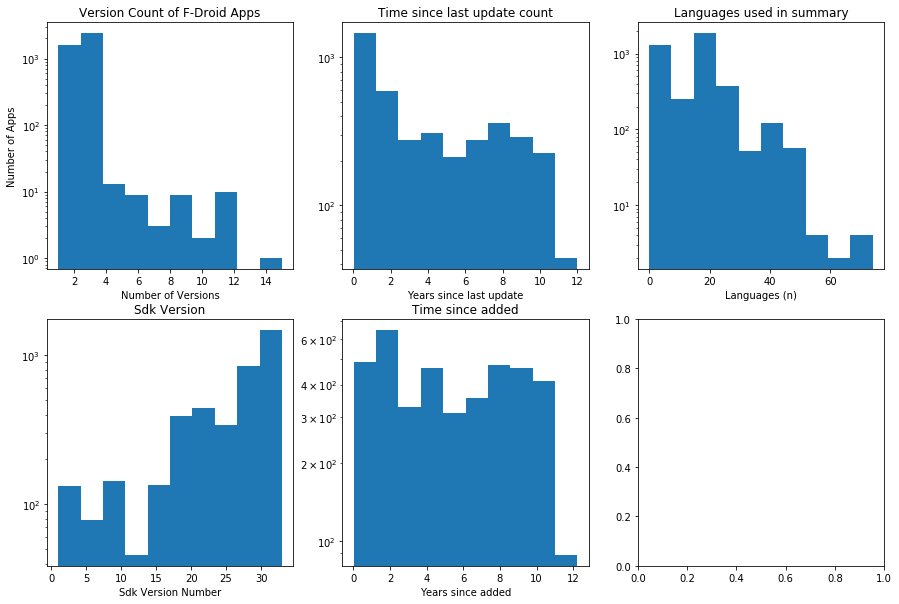

In [4]:
# histogram showing and plot
import numpy as np
import matplotlib.pyplot as plt
import download

from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

def secondsToYears(s):
    return ((s/60./60)/24.)/365.
def yearsSince(ms):
    return secondsToYears(unixtime - (ms/1000.))
versionList = []
lastUpdateList = []
addedSinceList = []
sdkVersionList = []
summaryLangList = []
selected = []
bogusPkg = []
for key in repoKeys:
    current = repos['packages'][key]
    versionCount = len(current['versions'])
    metadata = current['metadata']
    meetsMetaCriteria = 'issueTracker' in metadata and 'sourceCode' in metadata and 'github' in metadata['sourceCode'] and 'github' in metadata['issueTracker'] and 'license' in metadata and 'webSite' in metadata

    descriptionLangs = set()
    summaryLangSize = 0
    if 'summary' in metadata:
        summaryLangSize=len(metadata['summary'].keys())
    summaryLangList.append(summaryLangSize)
    if 'description' in metadata:
        descriptionLangs = metadata["description"].keys()

    lastUpdated = metadata['lastUpdated']
    added = metadata['added']
    latestRelease = download.latestVersion(current)
    manifest = latestRelease['manifest']
    sdkVersion = None
    if 'usesSdk' in manifest:
        sdkVersion = manifest['usesSdk']['targetSdkVersion']
        if(sdkVersion < 34): # bogus sdk versions???
            sdkVersionList.append(sdkVersion)
        else:
            bogusPkg.append(key)


    timeSinceUpdate = yearsSince(lastUpdated)
    addedSince = yearsSince(added)
    addedSinceList.append(addedSince)
    timeSinceAdded = yearsSince(added)
    lastUpdateList.append(timeSinceUpdate)
    versionList.append(versionCount)
    #and summaryLangSize > 15
    if timeSinceUpdate < 2.0 and timeSinceAdded > 8.0 and (sdkVersion is not None) and sdkVersion > 28 and "en-US" in descriptionLangs and meetsMetaCriteria:
        webSite = metadata['webSite']
        if download.url_ok(webSite):
            selected.append((key,current))

counts,bins = np.histogram(versionList)
fig,axs = plt.subplots(2,3)
fig.suptitle("")
axs[0][0].hist(bins[:-1], bins, weights=counts, log=True)
axs[0][0].set_title("Version Count of F-Droid Apps")
axs[0][0].set_xlabel("Number of Versions")
axs[0][0].set_ylabel("Number of Apps")

counts,bins = np.histogram(lastUpdateList)
axs[0][1].hist(bins[:-1],bins,weights=counts,log=True)
axs[0][1].set_title("Time since last update count")
axs[0][1].set_xlabel("Years since last update")

counts,bins = np.histogram(summaryLangList )
axs[0][2].hist(bins[:-1],bins,weights=counts,log=True)
axs[0][2].set_title("Languages used in summary")
axs[0][2].set_xlabel("Languages (n)")


counts,bins = np.histogram(addedSinceList)
axs[1][1].hist(bins[:-1], bins,weights=counts,log=True)
axs[1][1].set_title("Time since added")
axs[1][1].set_xlabel("Years since added")

counts,bins = np.histogram(sdkVersionList)
axs[1][0].hist(bins[:-1], bins,weights=counts,log=True)
axs[1][0].set_title("Sdk Version")
axs[1][0].set_xlabel("Sdk Version Number")


In [5]:
#selectedKeys[0]
print("selected count: %i" % len(selected))
selectedKeys = [k[0] for k in selected]
for k in selectedKeys:
    if "antennapod" in k:
        print(k)
    if "connectbot" in k:
        print(k)



selected count: 73
de.danoeh.antennapod
org.connectbot


In [6]:
download.url_ok("http://connectbot.org")

True

In [7]:
for k in selectedKeys:
    print(k)

at.tomtasche.reader
be.digitalia.fosdem
ch.blinkenlights.android.vanilla
com.MarcosDiez.shareviahttp
com.android.keepass
com.asksven.betterbatterystats
com.byagowi.persiancalendar
com.darshancomputing.BatteryIndicatorPro
com.dozingcatsoftware.bouncy
com.duckduckgo.mobile.android
com.fsck.k9
com.gh4a
com.github.cetoolbox
com.github.ruleant.getback_gps
com.google.android.stardroid
com.gpl.rpg.AndorsTrail
com.ichi2.anki
com.knirirr.beecount
com.menny.android.anysoftkeyboard
com.nutomic.syncthingandroid
com.owncloud.android
com.pilot51.voicenotify
com.seafile.seadroid2
com.shatteredpixel.shatteredpixeldungeon
com.ubergeek42.WeechatAndroid
com.vsmartcard.remotesmartcardreader.app
com.yubico.yubioath
de.arnowelzel.android.periodical
de.blau.android
de.blinkt.openvpn
de.danoeh.antennapod
de.jkliemann.parkendd
de.markusfisch.android.wavelines
de.schildbach.wallet
de.schildbach.wallet_test
de.srlabs.snoopsnitch
de.syss.MifareClassicTool
dev.ukanth.ufirewall
info.guardianproject.pixelknot
jwtc.a

In [8]:
with open('fdroid_updatedLast2Yrs_addedOver8YrsAgo_engDesc_github_others', 'w') as f:
  f.write('\n'.join([s[0] for s in selected]))

In [9]:
# # Download them
# import main
# import importlib
# importlib.reload(main)
# outDir ="/Users/shawnmeier/Documents/data/fdroid_updatedLast2Yrs_addedOver8YrsAgo_engDesc_github_others"
# main.downloadPackages(selected, 15, outDir)

TypeError: unhashable type: 'dict'